In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from evosax import DiffusionEvolution
from evosax.problems import BBOBFitness
from evosax.utils import ESLog

# set dpi for plots in notebook
plt.rcParams["figure.dpi"] = 300

In [2]:
def run_diffusion_evo(num_dims, fn_name, population_size, num_generations):
    evaluator = BBOBFitness(fn_name, num_dims=num_dims)
    rng = jax.random.key(0)
    strategy = DiffusionEvolution(
        num_dims=num_dims,
        population_size=population_size,
        num_generations=num_generations,
        fitness_mapping="energy",
        alpha_schedule="cosine",
        scale_factor=4.0,
        sigma_init=0.05,
        num_latent_dims=2,
    )
    es_params = strategy.default_params

    # Jittable logging helper
    es_logging = ESLog(
        num_dims=num_dims, num_generations=num_generations, top_k=10, maximize=False
    )
    log = es_logging.initialize()
    state = strategy.initialize(rng, es_params)
    for i in range(num_generations):
        rng, rng_ask = jax.random.split(rng)
        # Ask for a set candidates
        x, state = strategy.ask(rng_ask, state, es_params)
        # Evaluate the candidates
        fitness = evaluator.rollout(rng, x)
        # Update the strategy based on fitness
        state = strategy.tell(x, fitness, state, es_params)
        # Update the log with results
        log = es_logging.update(log, x, fitness)
    return log


sphere_2_32_50_log = run_diffusion_evo(
    num_dims=2, fn_name="Sphere", population_size=32, num_generations=50
)
sphere_2_32_100_log = run_diffusion_evo(
    num_dims=2, fn_name="Sphere", population_size=32, num_generations=100
)

sphere_2_64_50_log = run_diffusion_evo(
    num_dims=2, fn_name="Sphere", population_size=64, num_generations=50
)
sphere_2_64_100_log = run_diffusion_evo(
    num_dims=2, fn_name="Sphere", population_size=64, num_generations=100
)

rosen_2_32_50_log = run_diffusion_evo(
    num_dims=2, fn_name="RosenbrockOriginal", population_size=32, num_generations=50
)
rosen_2_32_100_log = run_diffusion_evo(
    num_dims=2, fn_name="RosenbrockOriginal", population_size=32, num_generations=100
)

rosen_2_64_50_log = run_diffusion_evo(
    num_dims=2, fn_name="RosenbrockOriginal", population_size=64, num_generations=50
)
rosen_2_64_100_log = run_diffusion_evo(
    num_dims=2, fn_name="RosenbrockOriginal", population_size=64, num_generations=100
)

sphere_4_32_50_log = run_diffusion_evo(
    num_dims=4, fn_name="Sphere", population_size=32, num_generations=50
)
sphere_4_32_100_log = run_diffusion_evo(
    num_dims=4, fn_name="Sphere", population_size=32, num_generations=100
)

sphere_4_64_50_log = run_diffusion_evo(
    num_dims=4, fn_name="Sphere", population_size=64, num_generations=50
)
sphere_4_64_100_log = run_diffusion_evo(
    num_dims=2, fn_name="Sphere", population_size=64, num_generations=100
)

rosen_4_32_50_log = run_diffusion_evo(
    num_dims=4, fn_name="RosenbrockOriginal", population_size=32, num_generations=50
)
rosen_4_32_100_log = run_diffusion_evo(
    num_dims=4, fn_name="RosenbrockOriginal", population_size=32, num_generations=100
)

rosen_4_64_50_log = run_diffusion_evo(
    num_dims=4, fn_name="RosenbrockOriginal", population_size=64, num_generations=50
)
rosen_4_64_100_log = run_diffusion_evo(
    num_dims=4, fn_name="RosenbrockOriginal", population_size=64, num_generations=100
)

I0000 00:00:1729516055.011067       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


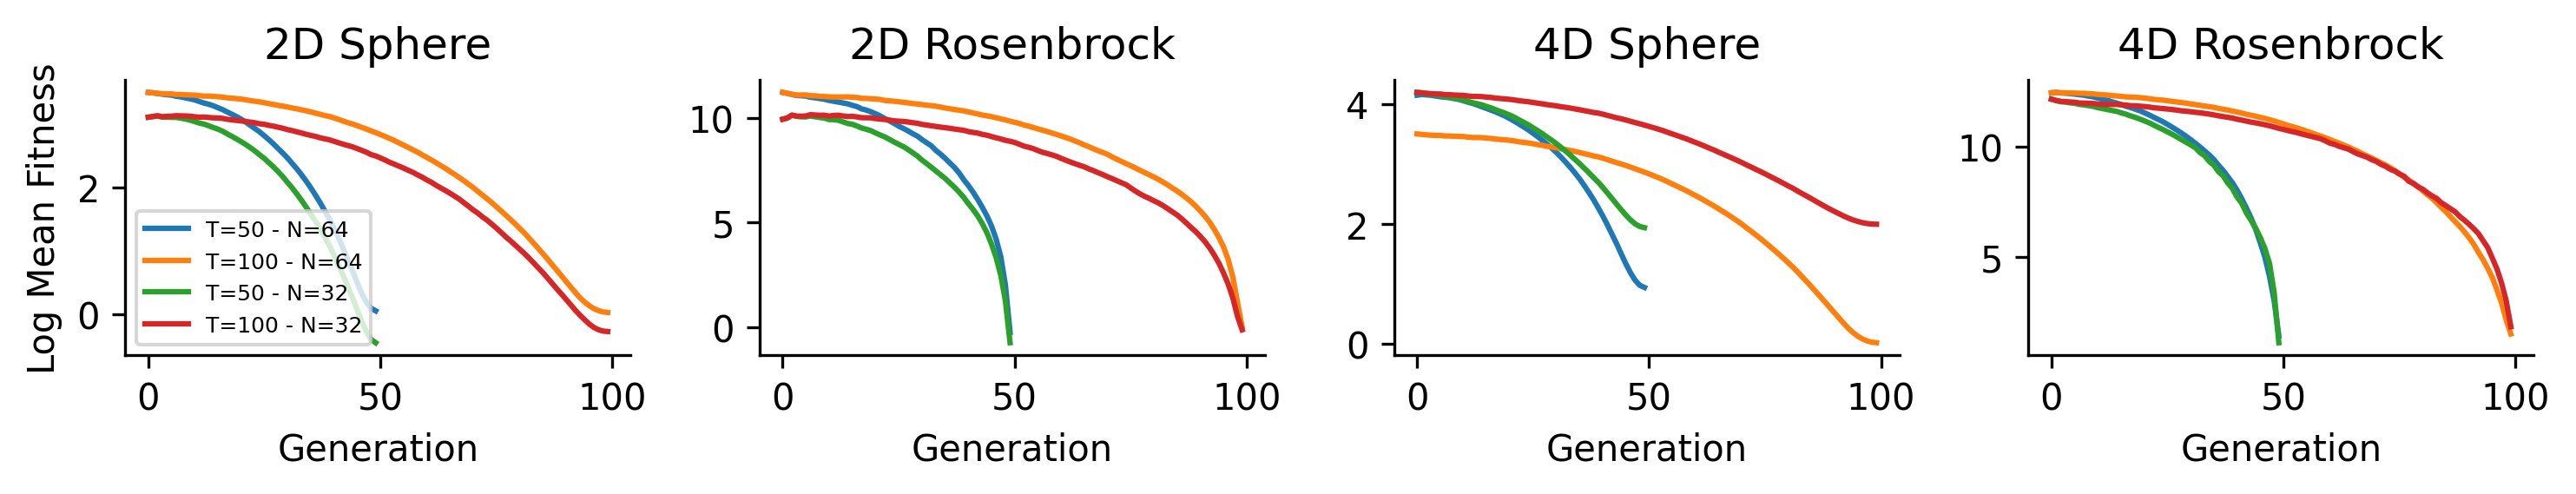

In [3]:
fig, axs = plt.subplots(1, 4, figsize=(10, 2))
axs[0].plot(np.log(sphere_2_64_50_log["log_gen_mean"]), label="T=50 - N=64")
axs[0].plot(np.log(sphere_2_64_100_log["log_gen_mean"]), label="T=100 - N=64")
axs[0].plot(np.log(sphere_2_32_50_log["log_gen_mean"]), label="T=50 - N=32")
axs[0].plot(np.log(sphere_2_32_100_log["log_gen_mean"]), label="T=100 - N=32")
axs[0].set_title("2D Sphere")
axs[1].plot(np.log(rosen_2_64_50_log["log_gen_mean"]), label="T=50 - N=64")
axs[1].plot(np.log(rosen_2_64_100_log["log_gen_mean"]), label="T=100 - N=64")
axs[1].plot(np.log(rosen_2_32_50_log["log_gen_mean"]), label="T=50 - N=32")
axs[1].plot(np.log(rosen_2_32_100_log["log_gen_mean"]), label="T=100 - N=32")
axs[1].set_title("2D Rosenbrock")
axs[2].plot(np.log(sphere_4_64_50_log["log_gen_mean"]), label="T=50 - N=64")
axs[2].plot(np.log(sphere_4_64_100_log["log_gen_mean"]), label="T=100 - N=64")
axs[2].plot(np.log(sphere_4_32_50_log["log_gen_mean"]), label="T=50 - N=32")
axs[2].plot(np.log(sphere_4_32_100_log["log_gen_mean"]), label="T=100 - N=32")
axs[2].set_title("4D Sphere")
axs[3].plot(np.log(rosen_4_64_50_log["log_gen_mean"]), label="T=50 - N=64")
axs[3].plot(np.log(rosen_4_64_100_log["log_gen_mean"]), label="T=100 - N=64")
axs[3].plot(np.log(rosen_4_32_50_log["log_gen_mean"]), label="T=50 - N=32")
axs[3].plot(np.log(rosen_4_32_100_log["log_gen_mean"]), label="T=100 - N=32")
axs[3].set_title("4D Rosenbrock")
axs[0].legend(fontsize=6)
for i in range(4):
    axs[i].set_xlabel("Generation")
axs[0].set_ylabel("Log Mean Fitness")
# no spines top/right
for i in range(4):
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)
# fig.suptitle("Diffusion Evolution on Sphere & Rosenbrock", y=.95, fontsize=16)
fig.tight_layout()

In [14]:
from evosax.problems import GymnaxFitness
from flax import linen as nn


class MLP(nn.Module):
    """Simple ReLU MLP."""

    num_hidden_units: int
    num_hidden_layers: int
    num_output_units: int

    @nn.compact
    def __call__(self, x, rng):
        for l in range(self.num_hidden_layers):
            x = nn.Dense(features=self.num_hidden_units)(x)
            x = nn.relu(x)
        x = nn.Dense(features=self.num_output_units)(x)
        return jax.random.categorical(rng, x)


def run_diffusion_evo_cartpole(
    population_size, num_generations, alpha_schedule="cosine", fitness_map_temp=1.0
):
    # Instantiate model callables and get a placeholder pytree
    rng = jax.random.key(0)
    network = MLP(64, 2, 2)
    policy_params = network.init(
        rng,
        jnp.zeros(
            4,
        ),
        rng,
    )

    strategy = DiffusionEvolution(
        population_size=population_size,
        pholder_params=policy_params,
        num_generations=num_generations,
        maximize=True,
        fitness_mapping="energy",
        alpha_schedule=alpha_schedule,
        # scale_factor=4.0,
        sigma_init=0.15,
        # num_latent_dims=2,
    )

    state = strategy.initialize(rng, strategy.default_params)
    x, state = strategy.ask(rng, state, strategy.default_params)
    es_params = strategy.default_params.replace(fitness_map_temp=fitness_map_temp)

    evaluator = GymnaxFitness(
        "CartPole-v1",
        num_env_steps=200,
        num_rollouts=16,
    )
    evaluator.set_apply_fn(network.apply)
    print_every_k_gens = 10
    state = strategy.initialize(rng, es_params)

    fitness_list = []
    best_fit_seen = []
    best = -float("inf")

    for gen in range(num_generations):
        rng, rng_init, rng_ask, rng_eval = jax.random.split(rng, 4)
        x, state = strategy.ask(rng_ask, state, es_params)
        fitness = evaluator.rollout(rng_eval, x).mean(axis=1)
        state = strategy.tell(x, fitness, state, es_params)
        if (gen + 1) % print_every_k_gens == 0:
            print(
                "Generation: ",
                gen + 1,
                "Performance: ",
                state.best_fitness,
                fitness.mean(),
            )
        fitness_list.append(jnp.array(fitness).mean())
        best = max(best, fitness.max())
        best_fit_seen.append(best)
    return fitness_list, best_fit_seen

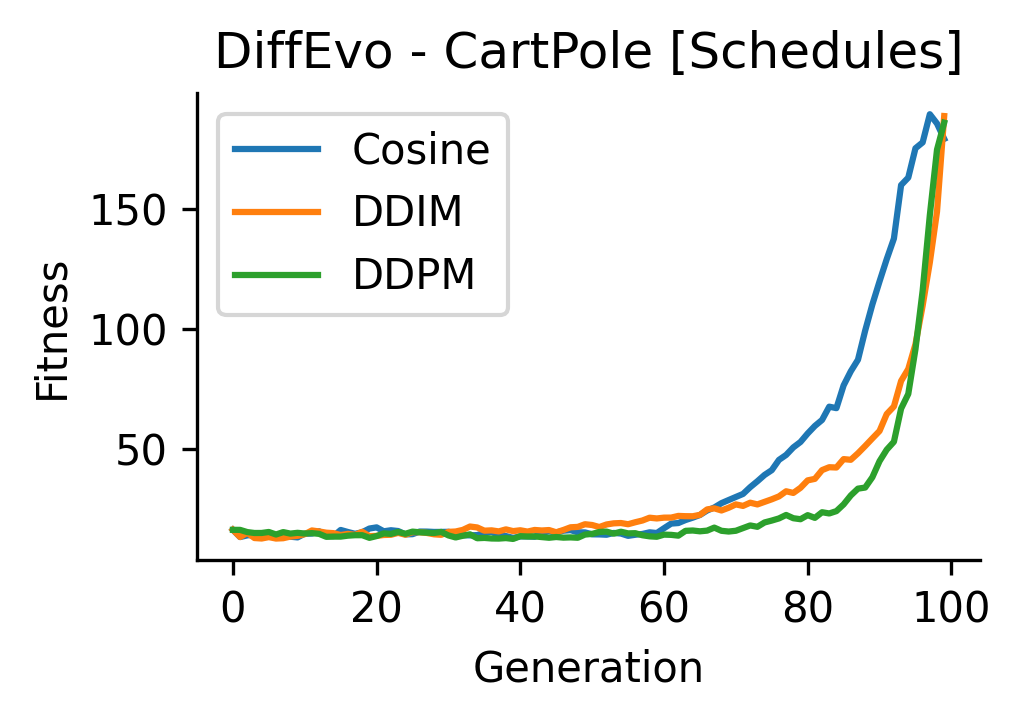

In [13]:
cart_fit_64_100_cos, cart_best_64_100_cos = run_diffusion_evo_cartpole(
    population_size=64, num_generations=100, alpha_schedule="cosine"
)

cart_fit_64_100_ddim, cart_best_64_100_ddim = run_diffusion_evo_cartpole(
    population_size=64, num_generations=100, alpha_schedule="ddim"
)

cart_fit_64_100_ddpm, cart_best_64_100_ddpm = run_diffusion_evo_cartpole(
    population_size=64, num_generations=100, alpha_schedule="ddpm"
)

# # plot the fitness results with log
# import matplotlib.pyplot as plt
# import numpy as np

# plot log of fitness
fig, ax = plt.subplots(figsize=(3.5, 2.5))
ax.plot(np.array(cart_fit_64_100_cos), label="Cosine")
ax.plot(np.array(cart_fit_64_100_ddim), label="DDIM")
ax.plot(np.array(cart_fit_64_100_ddpm), label="DDPM")
ax.legend()
ax.set_ylabel("Fitness")
ax.set_xlabel("Generation")
ax.set_title("DiffEvo - CartPole [Schedules]")
# no spines top/right
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.tight_layout()

ParameterReshaper: 4610 parameters detected for optimization.
Generation:  10 Performance:  110.0 9.5625
Generation:  20 Performance:  110.0 9.3125
Generation:  30 Performance:  110.0 9.125
Generation:  40 Performance:  110.0 9.3125
Generation:  50 Performance:  110.0 9.375
Generation:  60 Performance:  110.0 8.75
Generation:  70 Performance:  110.0 9.5625
Generation:  80 Performance:  110.0 9.25
Generation:  90 Performance:  110.0 9.375
Generation:  100 Performance:  110.0 9.3125
ParameterReshaper: 4610 parameters detected for optimization.
Generation:  10 Performance:  110.0 13.255859
Generation:  20 Performance:  149.25 16.94629
Generation:  30 Performance:  149.25 15.538086
Generation:  40 Performance:  149.25 13.038086
Generation:  50 Performance:  149.25 15.334961
Generation:  60 Performance:  149.25 15.072266
Generation:  70 Performance:  176.5625 28.823242
Generation:  80 Performance:  188.6875 53.01465
Generation:  90 Performance:  200.0 110.28516
Generation:  100 Performance:

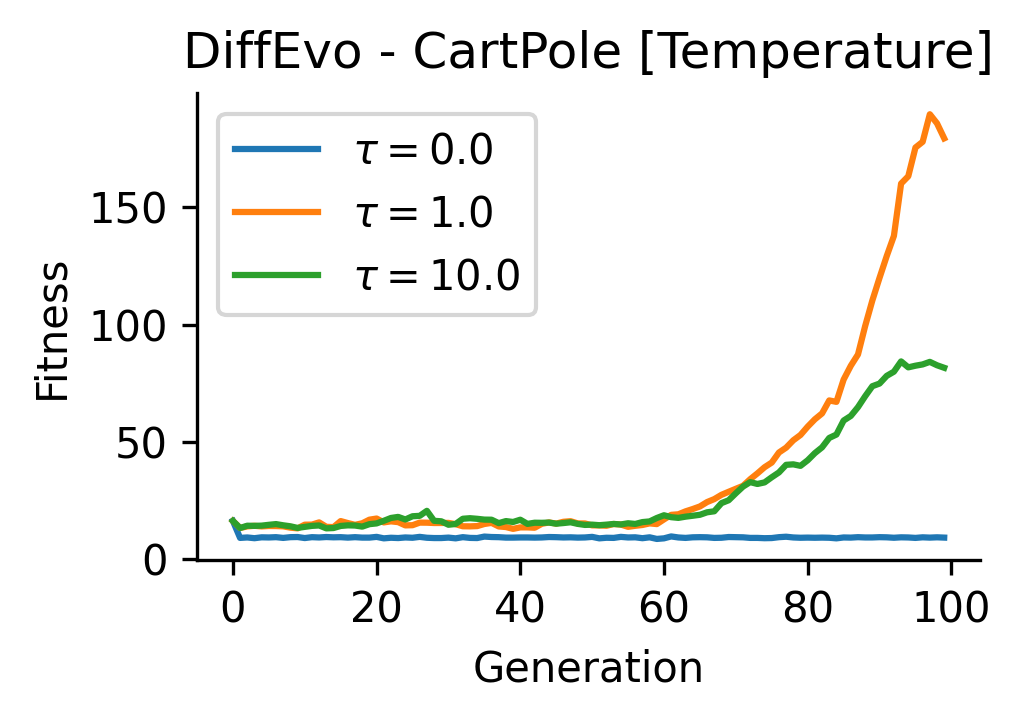

In [21]:
cart_fit_64_100_t_0, cart_best_64_100_t_0 = run_diffusion_evo_cartpole(
    population_size=64,
    num_generations=100,
    alpha_schedule="cosine",
    fitness_map_temp=0.0000,
)

cart_fit_64_100_t_1, cart_best_64_100_t_1 = run_diffusion_evo_cartpole(
    population_size=64,
    num_generations=100,
    alpha_schedule="cosine",
    fitness_map_temp=1.0,
)

cart_fit_64_100_t_10, cart_best_64_100_t_10 = run_diffusion_evo_cartpole(
    population_size=64,
    num_generations=100,
    alpha_schedule="cosine",
    fitness_map_temp=10.0,
)

# plot the fitness results with log
import matplotlib.pyplot as plt
import numpy as np

# plot log of fitness
fig, ax = plt.subplots(figsize=(3.5, 2.5))
ax.plot(np.array(cart_fit_64_100_t_0), label=r"$\tau=0.0$")
ax.plot(np.array(cart_fit_64_100_t_1), label=r"$\tau=1.0$")
ax.plot(np.array(cart_fit_64_100_t_10), label=r"$\tau=10.0$")
ax.legend()
ax.set_ylabel("Fitness")
ax.set_xlabel("Generation")
ax.set_title("DiffEvo - CartPole [Temperature]")
# no spines top/right
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.tight_layout()

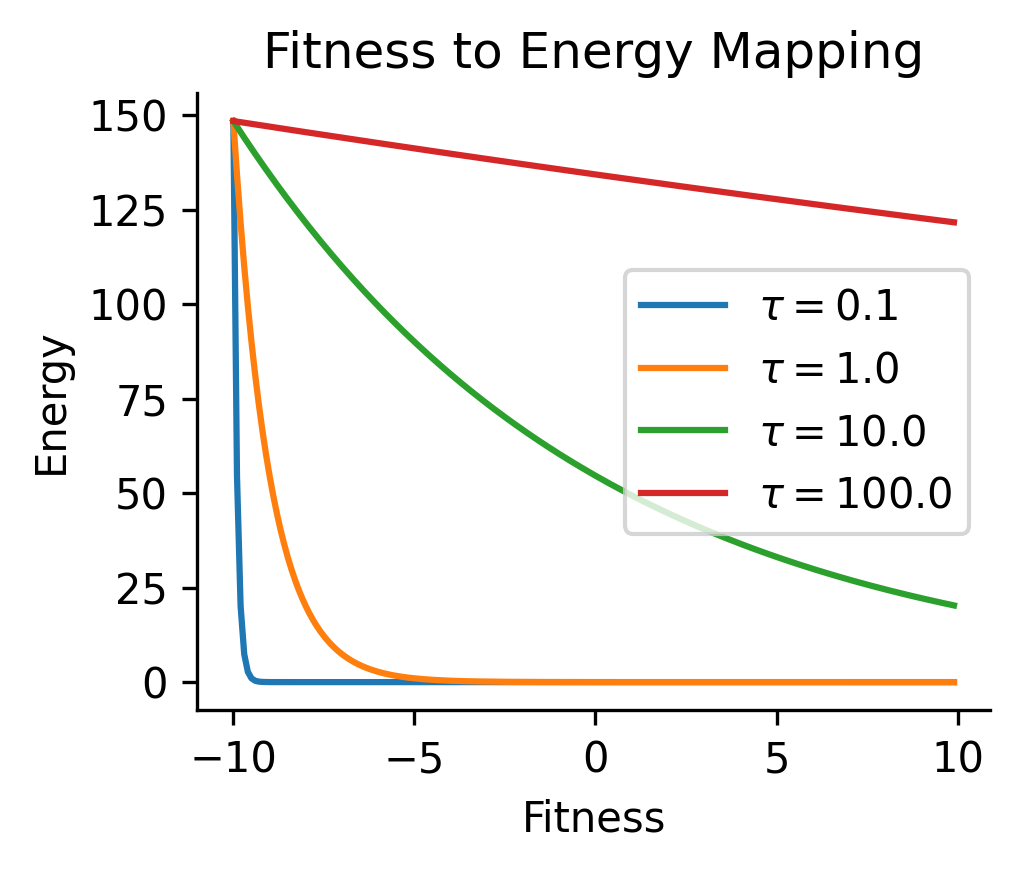

In [45]:
from evosax.strategies.diffusion import map_fitness2energy

fitness = jnp.arange(-10, 10, 0.1)
energy_01 = map_fitness2energy(fitness, 0.1, 1.0, 1.0)
energy_1 = map_fitness2energy(fitness, 1.0, 1.0, 1.0)
energy_10 = map_fitness2energy(fitness, 10.0, 1.0, 1.0)
energy_100 = map_fitness2energy(fitness, 100.0, 1.0, 1.0)

fig, ax = plt.subplots(figsize=(3.5, 3))
ax.plot(fitness, energy_01, label=r"$\tau=0.1$")
ax.plot(fitness, energy_1, label=r"$\tau=1.0$")
ax.plot(fitness, energy_10, label=r"$\tau=10.0$")
ax.plot(fitness, energy_100, label=r"$\tau=100.0$")
ax.legend()
ax.set_ylabel("Energy")
ax.set_xlabel("Fitness")
ax.set_title("Fitness to Energy Mapping")
# no spines top/right
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.tight_layout()

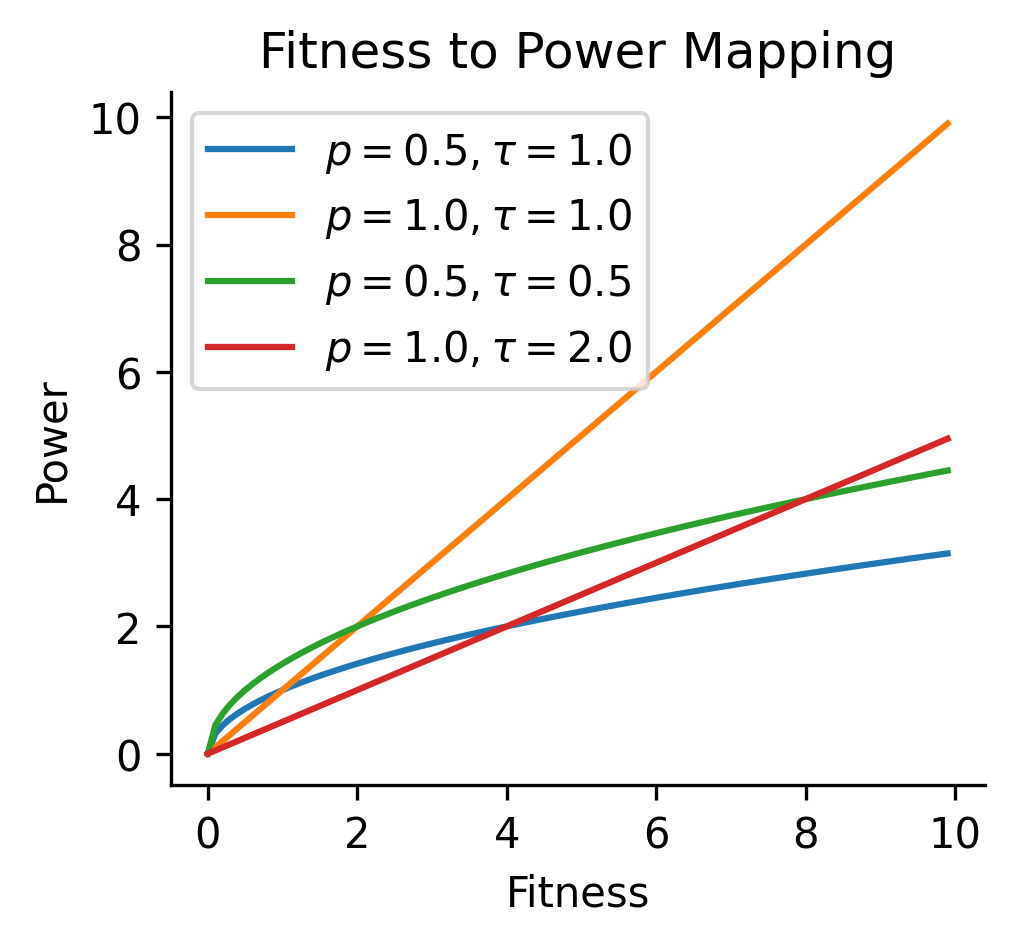

In [76]:
def map_fitness2power(
    fitness: chex.Array, temp: float, power: float, l2_factor: float
) -> chex.Array:
    """Map fitness to power."""
    return jnp.power(fitness / temp, power)


fitness = np.arange(0, 10, 0.1)
power_1 = map_fitness2power(fitness, 1.0, 0.5, 1.0)
power_2 = map_fitness2power(fitness, 1.0, 1.0, 1.0)
power_3 = map_fitness2power(fitness, 0.5, 0.5, 1.0)
power_4 = map_fitness2power(fitness, 2.0, 1.0, 1.0)

fig, ax = plt.subplots(figsize=(3.5, 3))
ax.plot(fitness, power_1, label=r"$p=0.5, \tau=1.0$")
ax.plot(fitness, power_2, label=r"$p=1.0, \tau=1.0$")
ax.plot(fitness, power_3, label=r"$p=0.5, \tau=0.5$")
ax.plot(fitness, power_4, label=r"$p=1.0, \tau=2.0$")
ax.legend()
ax.set_ylabel("Power")
ax.set_xlabel("Fitness")
ax.set_title("Fitness to Power Mapping")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)